In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os


os.chdir('C:/Users/AC30796/PycharmProjects')
print(os.getcwd())

d0 = pd.read_csv('./train.csv')
print(d0.head(5))

l = d0['label']
print(l.head(5))

d = d0.drop("label",axis=1)
print(d.head(5))

C:\Users\AC30796\PycharmProjects


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [2]:
print(d.shape)
print(l.shape)


(42000, 784)
(42000,)


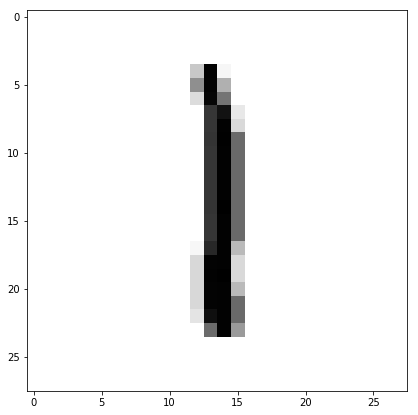

1


In [3]:
plt.figure(figsize=(7,7))
index=1000
grid_data = d.iloc[index].values.reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap= "Greys")
plt.show()

print(l[index])


In [4]:
lables = l.head(15000)
data = d.head(15000)


In [6]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [7]:
sample_data= standardized_data
cov_Mat = np.matmul(sample_data.T, sample_data)
print(cov_Mat.shape)

(784, 784)


In [12]:
from scipy.linalg import eigh
vlaues, vectors = eigh(cov_Mat,eigvals=(782,783))
vectors= vectors.T
print("shape of eigen vectors", vectors.shape)


shape of eigen vectors (2, 784)


In [41]:
import matplotlib.pylab as plt
new_coordinates = np.matmul(vectors, sample_data.T)
print("result:", vectors.shape , "X" , sample_data.T.shape , "=" , new_coordinates.shape)

result: (2, 784) X (784, 15000) = (2, 15000)


In [48]:
import pandas as pd
now_coordinates = np.vstack((new_coordinates, lables)).T

dataframe = pd.DataFrame(data=now_coordinates, columns=("1st_principal", "2nd principal", "label"))
print(dataframe.head())

   1st_principal  2nd principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


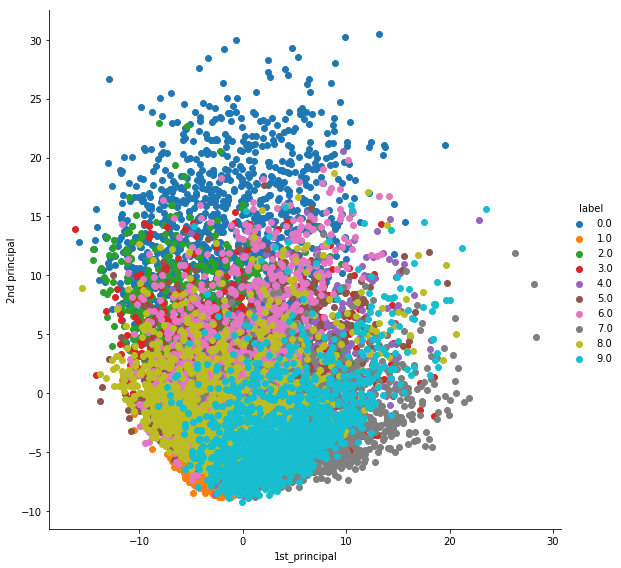

In [46]:
import seaborn as sns
sns.FacetGrid(dataframe, hue='label', height=8).map(plt.scatter, "1st_principal", "2nd principal").add_legend()
plt.show()

In [49]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

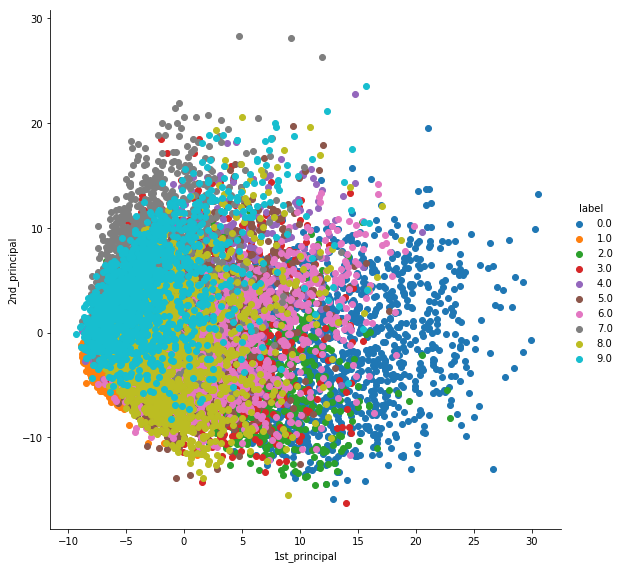

In [54]:
pca_df = np.vstack((pca_data.T,lables)).T
pca2_data = pd.DataFrame(data=pca_df, columns=("1st_principal", "2nd_principal","label"))

sns.FacetGrid(pca2_data, hue="label", height=8).map(plt.scatter,"1st_principal", "2nd_principal").add_legend()
plt.show()

In [81]:
data = d.head(42000)
lables = l.head(42000)
#from sklearn.preprocessing import StandardScaler
#standardD= StandardScaler().fit_transform(data)
#standardD.shape
from sklearn import decomposition
import seaborn as sns
pca = decomposition.PCA()
pca.n_components=2
new_data = pca.fit_transform(data)
new_data.shape
#new_data = new_data.T
#new_data.shape

(42000, 2)

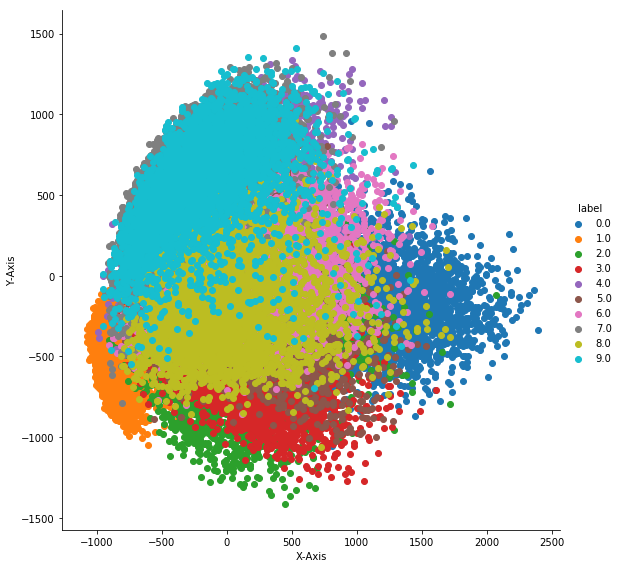

In [82]:
occurred_data = np.vstack((new_data.T, lables)).T

new_df = pd.DataFrame(data=occurred_data, columns=("X-Axis", "Y-Axis", "label"))

sns.FacetGrid(new_df, hue="label", height=8).map(plt.scatter, 'X-Axis', 'Y-Axis').add_legend()
plt.show()